In [183]:
import pandas as pd
import html
import numpy as np

In [184]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("../data/WikiArt-Emotions-Clean.csv")

# Movement

In [185]:
def movement_averages(df):
    df_avg = df.groupby('Movement').agg({
        'IT_gratitude': 'mean',
        'IT_happiness': 'mean',
        'IT_humility': 'mean',
        'IT_love': 'mean',
        'IT_optimism': 'mean',
        'IT_trust': 'mean',
        'IT_agreeableness': 'mean',
        'IT_anticipation': 'mean',
        'IT_disagreeableness': 'mean',
        'IT_shyness': 'mean',
        'IT_surprise': 'mean',
        'IT_neutral': 'mean',
        'IT_anger': 'mean',
        'IT_arrogance': 'mean',
        'IT_disgust': 'mean',
        'IT_fear': 'mean',
        'IT_pessimism': 'mean',
        'IT_regret': 'mean',
        'IT_sadness': 'mean',
        'IT_shame': 'mean',
    }).reset_index()

    df_avg['Pos_avg'] = df_avg[['IT_gratitude', 'IT_happiness', 'IT_humility', 'IT_love', 'IT_optimism', 'IT_trust']].mean(axis=1).round(3)
    df_avg['Neu_avg'] = df_avg[['IT_agreeableness', 'IT_anticipation', 'IT_disagreeableness', 'IT_shyness', 'IT_surprise', 'IT_neutral']].mean(axis=1).round(3)
    df_avg['Neg_avg'] = df_avg[['IT_anger', 'IT_arrogance', 'IT_disgust', 'IT_fear', 'IT_pessimism', 'IT_regret', 'IT_sadness', 'IT_shame']].mean(axis=1).round(3)

    df = df_avg[['Movement', 'Pos_avg', 'Neu_avg', 'Neg_avg']]
    
    return df

In [186]:
df_movement = movement_averages(df)
df_movement

,Movement,Pos_avg,Neu_avg,Neg_avg
0,Abstract-Art,0.076,0.137,0.042
1,Abstract-Expressionism,0.061,0.131,0.067
2,Art-Informel,0.055,0.128,0.075
3,Baroque,0.198,0.046,0.071
4,Color-Field-Painting,0.085,0.125,0.038
5,Cubism,0.121,0.107,0.050
6,Early-Renaissance,0.238,0.043,0.070
7,Expressionism,0.157,0.061,0.083
8,High-Renaissance,0.261,0.046,0.059
9,Impressionism,0.236,0.044,0.041


In [187]:
df_movement.describe()

,Pos_avg,Neu_avg,Neg_avg
count,22.000000,22.000000,22.000000
mean,0.154045,0.081773,0.061455
std,0.070602,0.037964,0.015886
min,0.055000,0.043000,0.038000
25%,0.085250,0.045250,0.049250
50%,0.164000,0.068500,0.059000
75%,0.215000,0.122250,0.074000
max,0.261000,0.137000,0.089000


In [188]:
def find_closest_movement(df, pos_avg, neu_avg, neg_avg): 
    """
    This function calculates the Euclidean distance between a given 
    vector of values (represented by pos_avg, neu_avg and neg_avg). 
    Then, it finds the index of the minimum distance value and returns 
    the artistic movement corresponding to that index.
    """
    distances = np.sqrt((df['Pos_avg'] - pos_avg) ** 2 +
                        (df['Neu_avg'] - neu_avg) ** 2 +
                        (df['Neg_avg'] - neg_avg) ** 2)
    
    closest_index = distances.idxmin()
    closest_movement = df.loc[closest_index, 'Movement']
    
    return closest_movement

In [189]:
find_closest_movement(df_movement, 0.114, -0.001, 0.09)

'Expressionism'

# Artist

In [190]:
def artist_avg_distances(df):
    df_avg_artist= df.groupby('Artist').agg({
        'IT_gratitude': 'mean',
        'IT_happiness': 'mean',
        'IT_humility': 'mean',
        'IT_love': 'mean',
        'IT_optimism': 'mean',
        'IT_trust': 'mean',

        'IT_agreeableness': 'mean',
        'IT_anticipation': 'mean',
        'IT_disagreeableness': 'mean',
        'IT_shyness': 'mean',
        'IT_surprise': 'mean',
        'IT_neutral': 'mean',

        'IT_anger': 'mean',
        'IT_arrogance': 'mean',
        'IT_disgust': 'mean',
        'IT_fear': 'mean',
        'IT_pessimism': 'mean',
        'IT_regret': 'mean',
        'IT_sadness': 'mean',
        'IT_shame': 'mean',
    }).reset_index()

    df_avg_artist['Pos_avg'] = df_avg_artist[['IT_gratitude', 'IT_happiness', 'IT_humility', 'IT_love', 'IT_optimism', 'IT_trust']].mean(axis=1).round(3)
    df_avg_artist['Neu_avg'] = df_avg_artist[['IT_agreeableness', 'IT_anticipation', 'IT_disagreeableness', 'IT_shyness', 'IT_surprise', 'IT_neutral']].mean(axis=1).round(3)
    df_avg_artist['Neg_avg'] = df_avg_artist[['IT_anger', 'IT_arrogance', 'IT_disgust', 'IT_fear', 'IT_pessimism', 'IT_regret', 'IT_sadness', 'IT_shame']].mean(axis=1).round(3)

    df = df_avg_artist[['Artist', 'Pos_avg', 'Neu_avg', 'Neg_avg']]
    
    return df


In [191]:
df_artist = artist_avg_distances(df)

In [192]:
df_artist

,Artist,Pos_avg,Neu_avg,Neg_avg
0,Aaron Siskind,0.110,0.088,0.066
1,Abidin Dino,0.050,0.082,0.121
2,Abraham Manievich,0.080,0.054,0.142
3,Abraham van Strij,0.297,0.030,0.024
4,Ad Reinhardt,0.054,0.133,0.047
...,...,...,...,...
996,Yves Klein,0.078,0.115,0.023
997,Yves Tanguy,0.053,0.098,0.122
998,Zao Wou-Ki,0.037,0.126,0.083
999,Zaya,0.275,0.057,0.026


In [193]:
df_artist.describe()

,Pos_avg,Neu_avg,Neg_avg
count,1001.000000,1001.000000,1001.000000
mean,0.142423,0.087066,0.061389
std,0.087608,0.046848,0.043960
min,0.000000,0.000000,0.000000
25%,0.068000,0.047000,0.032000
50%,0.122000,0.082000,0.051000
75%,0.208000,0.125000,0.082000
max,0.467000,0.233000,0.364000


In [194]:
def find_closest_artist(df, pos_avg, neu_avg, neg_avg):
    """
    This function calculates the Euclidean distance between a given 
    vector of values (represented by pos_avg, neu_avg and neg_avg). 
    Then, it finds the index of the minimum distance value and returns 
    the artist corresponding to that index.
    """
    distances = np.sqrt((df['Pos_avg'] - pos_avg) ** 2 +
                        (df['Neu_avg'] - neu_avg) ** 2 +
                        (df['Neg_avg'] - neg_avg) ** 2)
    
    closest_index = distances.idxmin()
    closest_artist = df.loc[closest_index, 'Artist']
    
    return closest_artist


In [195]:
find_closest_artist(df_artist, 0.78, 0.098, 0.123)

'Johann Anton de Peters'

# Transfer Style

## Movement

In [196]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image

import os
import random

In [197]:
def get_random_movement_path(movement):
    """
    This function takes a "movement" argument, which represents the name of an artistic movement. 
    Then, it uses that name to construct a path to a folder containing images related to that movement
    and returns a random image.
    
    """
    movement_folder = os.path.join("..", "Images", "WikiArt", movement)
    files = os.listdir(movement_folder)
    random_image = random.choice(files)
    style_path = os.path.join(movement_folder, random_image)
    return style_path

In [198]:
movement = find_closest_movement(df_movement, 0.091, 0.010, 0.070)

In [199]:
movement_path = get_random_movement_path(movement)
movement_path

'../Images/WikiArt/Neo-Expressionism/577287dcedc2cb3880089a3e.jpg'

In [200]:
input_img = "selfie_9"
content_path = f"../images/cam_pictures/{input_img}.png" #user image

In [201]:
def load_img(path_to_img):
    """
    This function loads an image and performs a series of transformations. 
    Finally, the function returns the processed and resized image tensor.
    """
    max_dim = 512
    img = tf.io.read_file(path_to_img) # read the image
    img = tf.image.decode_image(img, channels=3) # decode the image
    img = tf.image.convert_image_dtype(img, tf.float32) # normalizes pixel values

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)

    img = tf.image.resize(img, new_shape) # scale the image dimensions
    img = img[tf.newaxis, :] # adds an additional dimension to the image tensor
    
    return img

In [202]:
def imshow(image, title=None):
    """
    This function takes an image tensor and displays it using Matplotlib
    """
    if len(image.shape) > 3:
        image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    if title:
        plt.title(title)

In [203]:
content_image = load_img(content_path)
movement_image = load_img(movement_path)

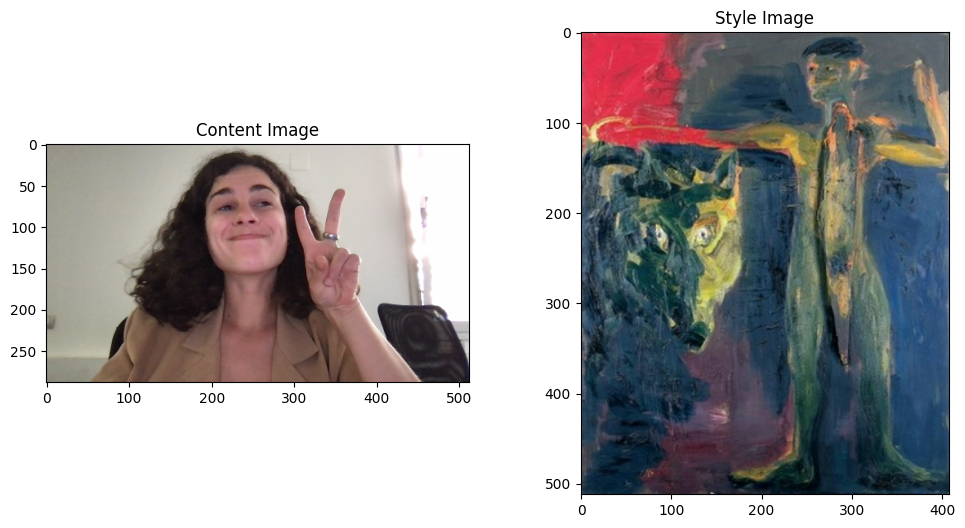

In [204]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(movement_image, 'Style Image')

In [205]:
import tensorflow_hub as hub

In [206]:
def stylize_image(content_image, movement_image):
    """
    This function loads a pre-trained image style model from TensorFlow Hub
    and uses it to apply the style of a content image to a motion image.
    It returns the styled image.
    """
    # charge pre-trained image style model
    hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

    # stylize the content image with the selected movement
    stylized_image = hub_model(tf.constant(content_image), tf.constant(movement_image))[0]

    return stylized_image

In [207]:
stylized_movement_img= stylize_image(content_image, movement_image)
stylized_movement_img

<tf.Tensor: shape=(1, 288, 512, 3), dtype=float32, numpy=
array([[[[0.3065018 , 0.39438084, 0.4993438 ],
         [0.2939528 , 0.3730388 , 0.46059418],
         [0.31974098, 0.4006539 , 0.47833738],
         ...,
         [0.33593306, 0.3847362 , 0.47767016],
         [0.33556113, 0.3847103 , 0.47589043],
         [0.33725458, 0.38561592, 0.47606024]],

        [[0.32574055, 0.40968838, 0.5104467 ],
         [0.30910397, 0.3890689 , 0.47095552],
         [0.33937612, 0.41961303, 0.4920671 ],
         ...,
         [0.33601278, 0.38505626, 0.47728762],
         [0.3364038 , 0.3849366 , 0.47596443],
         [0.33780056, 0.3852083 , 0.4760892 ]],

        [[0.28641233, 0.38062936, 0.46323135],
         [0.2753221 , 0.3652555 , 0.42382658],
         [0.312068  , 0.40173203, 0.45479557],
         ...,
         [0.334664  , 0.3857282 , 0.47568104],
         [0.3367849 , 0.38581258, 0.4753035 ],
         [0.33851618, 0.38611174, 0.47552413]],

        ...,

        [[0.51182246, 0.5135341 , 

In [208]:
def tensor_to_image(tensor):
    """
    This function turns a tensor into an image, scaling the values and adjusting 
    the dimensions as necessary to obtain an image suitable for display.
    """
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

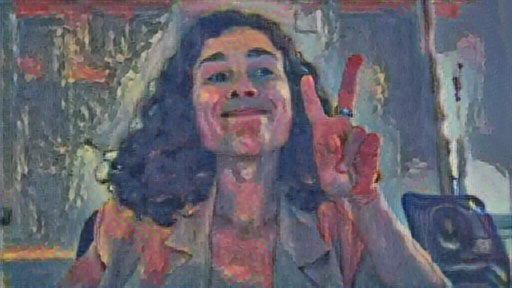

In [210]:
ntl_movement_img = tensor_to_image(stylized_movement_img)
ntl_movement_img

## Artist

In [172]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image

import os
import random

In [173]:
#0.080, 0.054, 0.142

In [174]:
#positive = float(input("Insert your POSITIVE feeling fromn 0.00 to 1.00:"))
#neutral = float(input("Insert your NEUTRAL feeling fromn 0.00 to 1.00:"))
#negative = float(input("Insert your NEGATIVE feeling fromn 0.00 to 1.00:"))

In [182]:
artist = find_closest_artist(df_artist, 0.080, 0.054, 0.142)
artist

'Abraham Manievich'

In [176]:
images_directory = "../Images/WikiArt/"

In [177]:
def get_random_artist_path(df_artist, artist, images_directory):
    artist_df = df_artist[df_artist['Artist'] == artist] # filter df by selected artist
    artist_ids = artist_df['ID'].tolist() # obtain list of ID's from the artist
    random_id = random.choice(artist_ids) # choose a random ID from the list

    movement = artist_df[artist_df['ID'] == random_id]['Movement'].values[0] # obtain movement of selected ID

    image_path = os.path.join(images_directory, movement.replace(" ", "_"), random_id + ".jpg") # build path using the work ID and the movement.
    
    return image_path

In [178]:
artist_path = get_random_artist_path(df, artist, images_directory)

In [179]:
artist_path

'../Images/WikiArt/Post-Impressionism/5772829fedc2cb3880f82bc6.jpg'

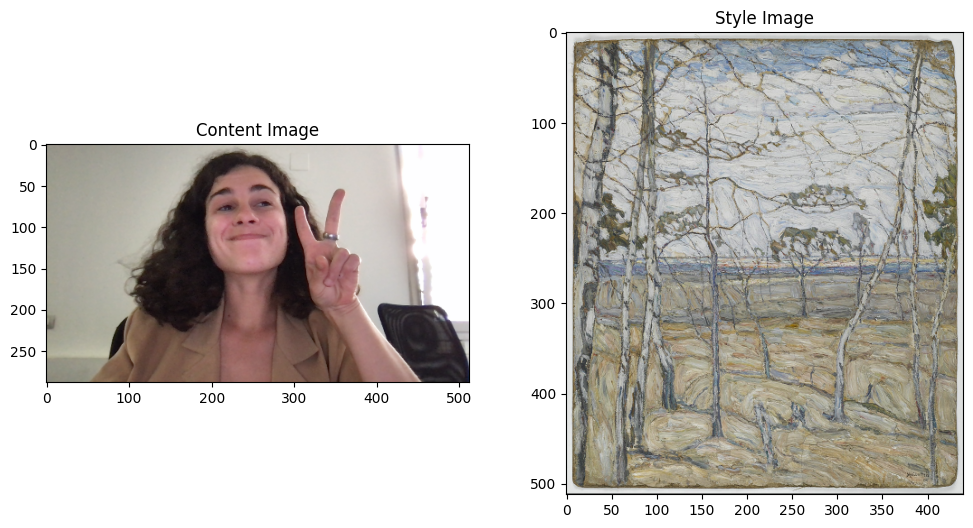

In [180]:
content_image = load_img(content_path)
artist_image = load_img(artist_path)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(artist_image, 'Style Image')

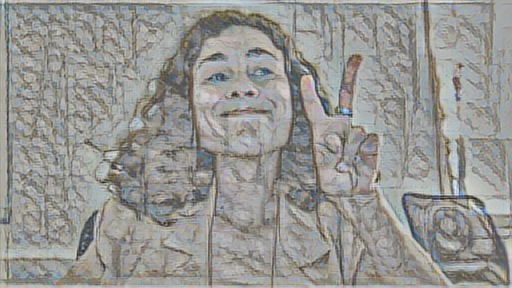

In [181]:
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(artist_image))[0]
tensor_to_image(stylized_image)